In [ ]:
!pip uninstall pyarrow -y
!pip uninstall datasets -y
!pip install pyarrow==10.0.1 datasets==2.4.0
!pip install transformers nltk
!pip install rouge_score
!pip install datasets transformers
!pip install py7zr
!pip install wandb
!pip install accelerate -U
!pip install transformers[torch]
!pip install datasets
!pip install rouge

Found existing installation: pyarrow 14.0.2
Uninstalling pyarrow-14.0.2:
  Successfully uninstalled pyarrow-14.0.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.9/35.9 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.8/95.8 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.5 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 kB 14.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the

In [ ]:
!git clone https://github.com/ryanzhumich/AESLC

Cloning into 'AESLC'...
remote: Enumerating objects: 17469, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 17469 (delta 1), reused 0 (delta 0), pack-reused 17461
Receiving objects: 100% (17469/17469), 7.36 MiB | 12.33 MiB/s, done.
Resolving deltas: 100% (48/48), done.
Updating files: 100% (18304/18304), done.


In [ ]:
import os
import pandas as pd

data_dir = "/content/AESLC/enron_subject_line"

def load_data(data_dir):
    data = {"body": [], "subject": [], "ann0": [], "ann1": [], "ann2": []}
    for split in ["train", "dev", "test"]:
        split_dir = os.path.join(data_dir, split)
        for filename in os.listdir(split_dir):
            if filename.endswith(".subject"):
                with open(os.path.join(split_dir, filename), "r") as file:
                    lines = file.readlines()
                    body = " ".join(lines[:-4])
                    subject = lines[-4].strip()[len("@subject "):]
                    ann0 = lines[-3].strip()[len("@ann0 "):]
                    ann1 = lines[-2].strip()[len("@ann1 "):]
                    ann2 = lines[-1].strip()[len("@ann2 "):]
                    data["body"].append(body)
                    data["subject"].append(subject)
                    data["ann0"].append(ann0)
                    data["ann1"].append(ann1)
                    data["ann2"].append(ann2)
    return pd.DataFrame(data)

In [ ]:
data = load_data(data_dir)

In [ ]:
data.head(15)

,body,subject,ann0,ann1,ann2
0,Just a note to let you know that per my conver...,,,ct,f Montreal
1,"Peter, I can't recall if I've sent you this ...",,,ct,de letter for ABB
2,"Esther, Gary asked me to send this info to y...",,,ct,er trip for Gary Hanks
3,"When: Thursday, October 25, 2001 2:00 PM-3:00 ...",55023,,ct,ess +
4,Tana - When you have the ETA amendment letter...,,,ct,nergySource Inc.
5,We have received the amendment to the BC Gas I...,ks.,,ct,Amendment
6,I have enclosed the final version of the Lette...,"ve received the signed faxes, I will allow th...",,ct,MasTec Letter Agreement
7,"Julie, The attached spreadsheet contains all ...",ably has all the contract numbers and could fi...,,ct,ment Data
8,This is an automatically generated Delivery St...,-jones@enron.com jeff.kabel@enron.com ...,,ct,ry Status Notification (Delay)
9,EA Estate Group: Please see the below referen...,Continuous Service--Vacation Allowed,,ct,on Policy Information


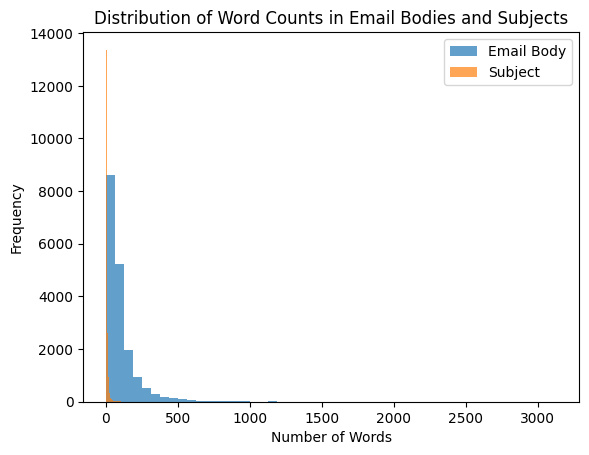

In [ ]:
import matplotlib.pyplot as plt

# Plot the number of words in email bodies and subjects
data['body_len'] = data['body'].apply(lambda x: len(x.split()))
data['subject_len'] = data['subject'].apply(lambda x: len(x.split()))

plt.hist(data['body_len'], bins=50, alpha=0.7, label='Email Body')
plt.hist(data['subject_len'], bins=50, alpha=0.7, label='Subject')
plt.legend()
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Distribution of Word Counts in Email Bodies and Subjects')
plt.show()


In [ ]:
from transformers import BertTokenizer, EncoderDecoderModel

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
model = EncoderDecoderModel.from_pretrained('patrickvonplaten/bert2bert-cnn_dailymail-fp16')
model.config.pad_token_id = tokenizer.pad_token_id  # Set the pad_token_id

config.json:   0%|          | 0.00/3.22k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/992M [00:00<?, ?B/s]

Some weights of the model checkpoint at patrickvonplaten/bert2bert-cnn_dailymail-fp16 were not used when initializing EncoderDecoderModel: ['decoder.bert.pooler.dense.bias', 'decoder.bert.pooler.dense.weight']
- This IS expected if you are initializing EncoderDecoderModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing EncoderDecoderModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
# Set pad_token_id for tokenizer
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token  # Use eos_token as pad_token if pad_token is not defined

# Set pad_token_id in model configuration
model.config.pad_token_id = tokenizer.pad_token_id

In [ ]:
print(f"Pad token ID: {model.config.pad_token_id}")

Pad token ID: 0


In [ ]:
def tokenize_data(df):
    # Tokenize input emails
    inputs = tokenizer(df['body'].tolist(), padding=True, truncation=True, return_tensors='pt', max_length=512)

    # Tokenize labels (subjects)
    labels = tokenizer(df['subject'].tolist(), padding=True, truncation=True, return_tensors='pt', max_length=64).input_ids

    # Replace -100 with pad_token_id
    labels = [[model.config.pad_token_id if label == -100 else label for label in item] for item in labels]

    return inputs, labels

inputs, labels = tokenize_data(data)


In [ ]:
from torch.utils.data import Dataset
import torch

class EmailDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

dataset = EmailDataset(inputs, labels)


In [ ]:
dataset.__len__()

18302

In [ ]:
from sklearn.model_selection import train_test_split

train_size = 0.8
train_indices, val_indices = train_test_split(range(len(dataset)), train_size=train_size, random_state=42)
train_dataset = torch.utils.data.Subset(dataset, train_indices)
val_dataset = torch.utils.data.Subset(dataset, val_indices)


In [ ]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    gradient_accumulation_steps=8,  # Accumulate gradients over several steps
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy='epoch',
    save_strategy='epoch',
    report_to='none',
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
)

trainer.train()


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-12-260dfcf9dd3a>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
/usr/local/lib/python3.10/dist-packages/transformers/models/encoder_decoder/modeling_encoder_decoder.py:622: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than tensor.new_tensor(sourceTensor).
  decoder_attention_mask = decoder_input_ids.new_tensor(decoder_input_ids != self.config.pad_token_id)
/usr/local/lib/python3.10/dist-packages/transforme

Epoch,Training Loss,Validation Loss
0,0.529000,0.590566
1,0.554200,0.515987
2,0.335900,0.512067


Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 142, 'min_length': 56, 'no_repeat_ngram_size': 3}
<ipython-input-12-260dfcf9dd3a>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
/usr/local/lib/python3.10/dist-packages/transformers/models/encoder_decoder/modeling_encoder_decoder.py:622: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than tensor.new_tensor(source

TrainOutput(global_step=1371, training_loss=1.1695748918426898, metrics={'train_runtime': 6465.9735, 'train_samples_per_second': 6.793, 'train_steps_per_second': 0.212, 'total_flos': 2.690977757165568e+16, 'train_loss': 1.1695748918426898, 'epoch': 2.9959027588090685})

In [ ]:
from datasets import load_metric

# Evaluate
eval_result = trainer.evaluate()
print(f"Evaluation result: {eval_result}")

<ipython-input-12-260dfcf9dd3a>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
/usr/local/lib/python3.10/dist-packages/transformers/models/encoder_decoder/modeling_encoder_decoder.py:622: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than tensor.new_tensor(sourceTensor).
  decoder_attention_mask = decoder_input_ids.new_tensor(decoder_input_ids != self.config.pad_token_id)
/usr/local/lib/python3.10/dist-packages/transformers/models/encoder_decoder/modeling_encoder_decoder.py:642: FutureWarning: Version v4.12.0 introduces a better way to train encoder-decoder models by computing the loss inside the encoder-decoder framework rather than in the dec

Evaluation result: {'eval_loss': 0.5120673179626465, 'eval_runtime': 175.6714, 'eval_samples_per_second': 20.84, 'eval_steps_per_second': 5.214, 'epoch': 2.9959027588090685}


In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
rouge = load_metric('rouge')
predictions, labels, _ = trainer.predict(val_dataset)
pred_str = tokenizer.batch_decode(predictions, skip_special_tokens=True)
label_str = tokenizer.batch_decode(labels, skip_special_tokens=True)

rouge_score = rouge.compute(predictions=pred_str, references=label_str)
print(f"ROUGE Score: {rouge_score}")

<ipython-input-12-260dfcf9dd3a>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


OutOfMemoryError: CUDA out of memory. Tried to allocate 90.00 MiB. GPU 

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
model.to(device)

In [ ]:
# Sample input
sample_body = "Hi Phillip, This message is to confirm our meeting with you on, Tuesday, October 30th from 9:00 am - 10:00 am, the location will be EB 3267. Attendees will be Monica Brown and Sheri Righi. Let me know if you have any questions. I can be reached at 713-345-6687. Thanks,"

# Tokenize input and move tensors to the appropriate device
inputs = tokenizer(sample_body, return_tensors='pt', truncation=True, padding=True, max_length=512)
inputs = {key: value.to(device) for key, value in inputs.items()}

# Generate output
outputs = model.generate(**inputs, max_length=64, num_beams=4, early_stopping=True)

# Decode output
subject_line = tokenizer.decode(outputs[0], skip_special_tokens=True)
print(f"Generated Subject Line: {subject_line}")

Generated Subject Line: rward to hearing from you... thank you for your help.. thanks, karen brown and i hope you can reach me at ( 713 ) 853 - 3457 thanks for all of your help and support.. e - mail : master. tully @ enron. com


In [ ]:
# Sample input
sample_body = """
All: Attached you will find a list that reflects your seat assignments for Business Continuity Planning (BCP).
These seats are located on the 30th and 31st Floors of Enron Center North (ECN).
As previously communicated, you will report to these designated seats in the event of an outage in ECS.
The exception to this is as follows: If your seat assignment is located on the 31st Floor, you will report to your original location that you occupied prior to your move into ECS.
This will hold true until the Monday after Thanksgiving, as we will have the 31st floor seats set up at that time.
Testing: Once you have moved to ECS, if you would like to test your BCP location, you will be able to test your seat for functionality every Thursday from 3-6pm.
Testing is not required, but is highly recommended.
If anyone has any questions or concerns about these procedures, please feel free to contact me at any time.
Regards,

@subject
BCP Seat Assignments

@ann0
your seat assignments for business continuity planning (bcp).

@ann1
bcp seat assignments

@ann2
here are your seat assignments for the business continuity planning event
"""

# Tokenize input and move tensors to the appropriate device
inputs = tokenizer(sample_body, return_tensors='pt', truncation=True, padding=True, max_length=512)
inputs = {key: value.to(device) for key, value in inputs.items()}

# Generate output
outputs = model.generate(**inputs, max_length=64, num_beams=4, early_stopping=True)

# Decode output
subject_line = tokenizer.decode(outputs[0], skip_special_tokens=True)
print(f"Generated Subject Line: {subject_line}")

Generated Subject Line: seat assignments for business continuity planning ( bcp ) and bcp location assignments for bcp office north ( ecn ) - please contact your seat assignments representative at any time please contact me at ( 713 ) 853 - 7600 or call ( 714 ) 854 - 853


In [ ]:
# Sample input
sample_body = "Hi team, the project deadline has been extended to next Friday. Please ensure all deliverables are completed by then. Thanks."

# Tokenize input and move tensors to the appropriate device
inputs = tokenizer(sample_body, return_tensors='pt', truncation=True, padding=True, max_length=512)
inputs = {key: value.to(device) for key, value in inputs.items()}

# Generate output
outputs = model.generate(**inputs, max_length=64, num_beams=4, early_stopping=True)

# Decode output
subject_line = tokenizer.decode(outputs[0], skip_special_tokens=True)
print(f"Generated Subject Line: {subject_line}")

Generated Subject Line: t me know if you have any questions or concerns about this project, please let me know by close of business, and i will send you a summary of the results of the project by next friday, then click on the e - mail if you would like to discuss.


In [ ]:
# Sample input
sample_body = "Michelle;  This is the presentation which was provided to the HR VP's.The HR VPs were tasked with going off to met their BU OTCs and devise plans around the three components.We are currently collating those plans into one document.We'll send that along to you when completed.Pls call if you have any questions."

# Tokenize input and move tensors to the appropriate device
inputs = tokenizer(sample_body, return_tensors='pt', truncation=True, padding=True, max_length=512)
inputs = {key: value.to(device) for key, value in inputs.items()}

# Generate output
outputs = model.generate(**inputs, max_length=64, num_beams=4, early_stopping=True)

# Decode output
subject_line = tokenizer.decode(outputs[0], skip_special_tokens=True)
print(f"Generated Subject Line: {subject_line}")

Generated Subject Line: rward to hearing from you... thank you for your help.. thanks for all of your help!.. i'm so sorry for the short notice on this - - i'll send it along with your thoughts on how to proceed with this.


In [ ]:
# Sample input
sample_body = "To confirm:  Mark Thomas Mike Presley  both previously on the list for Netco's Market Risk/Research Group have resigned.I'm combing the Estate for replacements.DP"

# Tokenize input and move tensors to the appropriate device
inputs = tokenizer(sample_body, return_tensors='pt', truncation=True, padding=True, max_length=512)
inputs = {key: value.to(device) for key, value in inputs.items()}

# Generate output
outputs = model.generate(**inputs, max_length=64, num_beams=4, early_stopping=True)

# Decode output
subject_line = tokenizer.decode(outputs[0], skip_special_tokens=True)
print(f"Generated Subject Line: {subject_line}")

Generated Subject Line: t me know if you have any questions or need anything else... i will be out until i get back to work on monday, and i'll be in touch with mark.. e.. mark will be looking for a replacement for mark and mark.


In [ ]:
generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
print(f"Generated Text: {generated_text}")

# Example of labels (ground truth) for ROUGE computation
# In practice, you should have your actual ground truth data here
# For demonstration, we use the same text as the reference
labels = ["Hi Phillip, This message is to confirm our meeting with you on, Tuesday, October 30th from 9:00 am - 10:00 am, the location will be EB 3267. Attendees will be Monica Brown and Sheri Righi. Let me know if you have any questions. I can be reached at 713-345-6687. Thanks,"]

# Compute ROUGE score
rouge_score = rouge.compute(predictions=[generated_text], references=labels)
print(f"ROUGE Score: {rouge_score}")

Generated Text: rward to hearing from you... thank you for your help.. thanks, karen brown and i hope you can reach me at ( 713 ) 853 - 3457 thanks for all of your help and support.. e - mail : master. tully @ enron. com
ROUGE Score: {'rouge1': AggregateScore(low=Score(precision=0.3157894736842105, recall=0.22641509433962265, fmeasure=0.2637362637362637), mid=Score(precision=0.3157894736842105, recall=0.22641509433962265, fmeasure=0.2637362637362637), high=Score(precision=0.3157894736842105, recall=0.22641509433962265, fmeasure=0.2637362637362637)), 'rouge2': AggregateScore(low=Score(precision=0.05405405405405406, recall=0.038461538461538464, fmeasure=0.0449438202247191), mid=Score(precision=0.05405405405405406, recall=0.038461538461538464, fmeasure=0.0449438202247191), high=Score(precision=0.05405405405405406, recall=0.038461538461538464, fmeasure=0.0449438202247191)), 'rougeL': AggregateScore(low=Score(precision=0.23684210526315788, recall=0.16981132075471697, fmeasure=0.197802197802